In [90]:
from selenium import webdriver
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd

import mplfinance as mpf





In [117]:
ticker_symbol = "GME"
tesla_stock = yf.Ticker(ticker_symbol)
historical_data = tesla_stock.history(period="7d",interval = "1m")
historical_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-08-14 09:30:00-04:00,19.750000,19.750000,19.629999,19.680799,128454,0.0,0.0
2023-08-14 09:31:00-04:00,19.680599,19.681000,19.520000,19.610001,33156,0.0,0.0
2023-08-14 09:32:00-04:00,19.620001,19.660000,19.525000,19.629900,24423,0.0,0.0
2023-08-14 09:33:00-04:00,19.600000,19.690001,19.590000,19.690001,24362,0.0,0.0
2023-08-14 09:34:00-04:00,19.680000,19.700001,19.650200,19.695000,15233,0.0,0.0


In [106]:
driver = webdriver.Chrome()
driver.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")

html_data = driver.page_source

driver.quit()

In [107]:
soup = BeautifulSoup(html_data, "html.parser")

In [108]:
soup = BeautifulSoup(html_data, "html.parser")

In [109]:
revenue_table = soup.find("table", class_="historical_data_table table")

In [110]:
table_rows = revenue_table.find_all("tr")

In [111]:
header = ["year","revenue"]

In [112]:
data = []
for row in table_rows[1:]:
    row_cells = row.find_all("td")
    row_data = [cell.get_text(strip=True) for cell in row_cells]
    data.append(row_data)

In [113]:
df = pd.DataFrame(data, columns=header)

In [114]:
header

['year', 'revenue']

In [115]:
df

,year,revenue
0,2023,"$5,927"
1,2022,"$6,011"
2,2021,"$5,090"
3,2020,"$6,466"
4,2019,"$8,285"
5,2018,"$8,547"
6,2017,"$7,965"
7,2016,"$9,364"
8,2015,"$9,296"
9,2014,"$9,040"


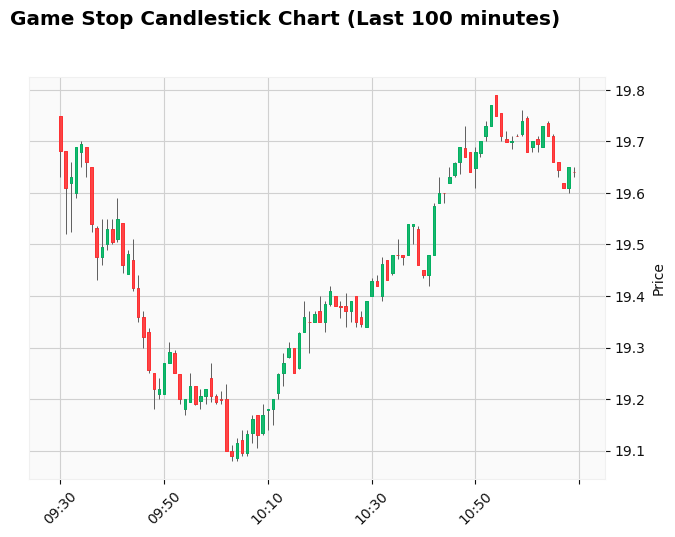

In [118]:
mpf.plot(historical_data.head(100), type="candle", style="yahoo", title="Game Stop Candlestick Chart (Last 100 minutes)")